In [2]:
import pandas as pd
import os
import time

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import decomposition
%matplotlib inline

In [3]:
data_folder = "held_in_csv/"
embedding_folder = "embeddings/"

In [4]:
labels_df = pd.read_csv(data_folder + "Y_held_in.csv")
labels_df.head()

,SMID,Diagnosis2,Score
0,101378,Negative,0
1,103694,Positive,2
2,106002,Negative,0
3,107667,Negative,0
4,107776,Negative,0


In [5]:
sentence_embeddings = np.load(embedding_folder + str(labels_df.SMID[400]) + ".npy")

In [25]:
len(labels_df)

670

In [8]:
sentence_embeddings = np.load(embedding_folder + str(labels_df.SMID[300]) + ".npy")
sentence_embeddings.shape[0]

4061

In [9]:
total = 670
num = np.zeros(total)
for k in range(total):

    SMID = labels_df.SMID[k]
    sentence_embeddings = np.load(embedding_folder + str(SMID) + ".npy")
    num[k] = sentence_embeddings.shape[0]

In [12]:
import seaborn as sns

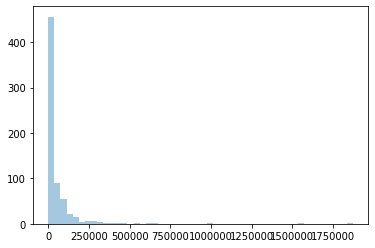

In [14]:
sns.distplot(num, kde=False);

In [29]:
idx = [i for i, x in enumerate((num<500000) & (num>2)) if x]

In [36]:
%%time
total = len(idx)
PC1 = np.zeros((768,total))
PC2 = np.zeros((768,total))
y = np.zeros(total)
pca = decomposition.PCA(n_components=2)

for i in range(total):

    k = idx[i]
    SMID = labels_df.SMID[k]
    sentence_embeddings = np.load(embedding_folder + str(SMID) + ".npy")
    pc = pca.fit_transform(sentence_embeddings.T)
    
    if labels_df['Diagnosis2'][k]=="Positive":
        y[i] = 1
    PC1[:,i] = pc[:,0]
    PC2[:,i] = pc[:,1]

CPU times: user 22min 41s, sys: 1min 1s, total: 23min 43s
Wall time: 5min 43s


In [37]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict,cross_val_score

In [38]:
total

656

In [42]:
X = PC2.T

In [40]:
y = y.astype(int)
np.bincount(y)

array([506, 150])

In [57]:
np.cov(PC1[:,y==0]).max()

59356.54741181953

In [50]:
np.cov(PC1).max()

61263.955888330674

In [58]:
np.cov(PC1[:,y==1]).max()

68090.55067713125

In [43]:
lm = linear_model.LogisticRegression()
predictions = cross_val_predict(lm, X, y, cv=5)
print(classification_report(y, predictions))


lm = linear_model.LogisticRegression(class_weight='balanced')
predictions = cross_val_predict(lm, X, y, cv=5)
print(classification_report(y, predictions))

/home/i/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/i/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       506
           1       0.25      0.20      0.22       150

    accuracy                           0.68       656
   macro avg       0.51      0.51      0.51       656
weighted avg       0.66      0.68      0.67       656

              precision    recall  f1-score   support

           0       0.79      0.63      0.70       506
           1       0.25      0.42      0.32       150

    accuracy                           0.58       656
   macro avg       0.52      0.53      0.51       656
weighted avg       0.66      0.58      0.61       656



/home/i/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/i/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [59]:
from numpy import linalg as LA

In [68]:
w, v = LA.eig(np.cov(PC2[:,y==0]))
print("Max eigval of negative" + str(w.max()))
w, v = LA.eig(np.cov(PC2[:,y==1]))
print("Max eigval of positive" + str(w.max()))
w, v = LA.eig(np.cov(PC2))
print("Max eigval of all"+str(w.max()))

Max eigval of negative(344597.4785263847+0j)
Max eigval of positive(339233.9929535644+0j)
Max eigval of all(343210.85948431015+0j)
